## Question 4: Use yfinance to Extract Stock Data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)
html_data_2 = response_2.text  # Save the HTML content as html_data_2

# Step 2: Parse the HTML data
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Extract all tables using read_html
tables_2 = pd.read_html(html_data_2)

# Step 4: Check how many tables are found and print them to verify the correct table
print(f"Total number of tables found: {len(tables_2)}")

# Let's print the first table to inspect its contents
print(tables_2[0])

# Assuming the relevant revenue table is the second table (index 1)
gme_revenue = tables_2[1]  # Check the second table

# Step 5: Rename columns to match "Date" and "Revenue"
gme_revenue.columns = ["Date", "Revenue"]  # Ensure the column names are correct

# Step 6: Remove dollar signs and commas from the 'Revenue' column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Step 7: Drop null or empty values in the 'Revenue' column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Step 8: Print the last 5 rows to check the data
print(gme_revenue.tail())


Total number of tables found: 6
    GameStop Annual Revenue (Millions of US $)  \
0                                         2020   
1                                         2019   
2                                         2018   
3                                         2017   
4                                         2016   
5                                         2015   
6                                         2014   
7                                         2013   
8                                         2012   
9                                         2011   
10                                        2010   
11                                        2009   
12                                        2008   
13                                        2007   
14                                        2006   
15                                        2005   

   GameStop Annual Revenue (Millions of US $).1  
0                                        $6,466  
1                

/tmp/ipykernel_1035/3389693851.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables_2 = pd.read_html(html_data_2)


In [2]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 3: Use yfinance to Extract Stock Data

In [3]:
import yfinance as yf

# Step 1: Create the ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Step 2: Extract stock data using the history function with the 'max' period
gme_data = gme_ticker.history(period="max")

# Step 3: Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Step 4: Display the first five rows of the gme_data dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [4]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [7]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 118.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 118.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 12.1 MB/s eta 0:00:00


## Question 6: Plot GameStop Stock Graph

/tmp/ipykernel_1035/2679604345.py:18: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



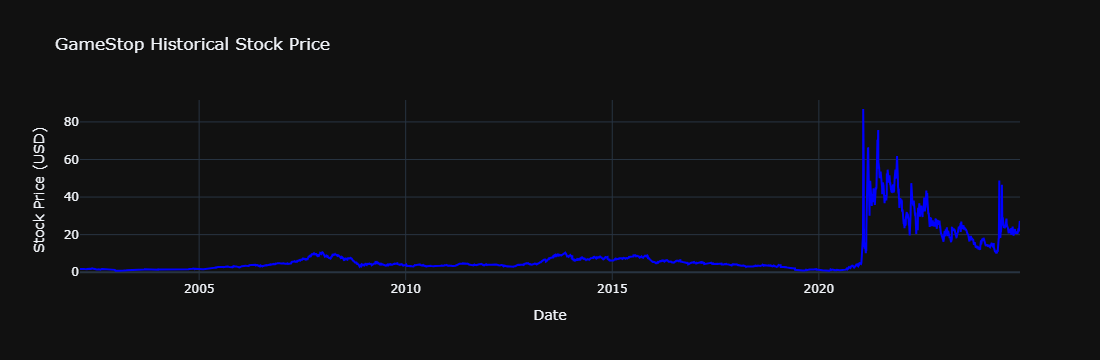

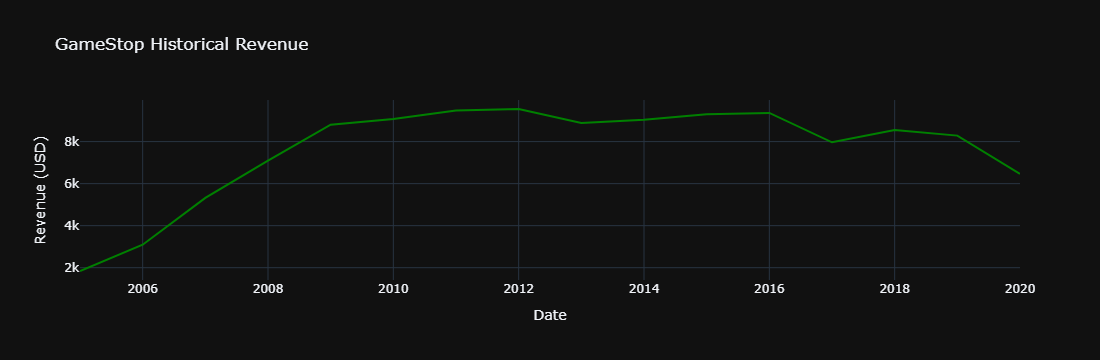

In [29]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go

# Step 1: Extract GameStop Stock Data using yfinance (data starting from at least 2006)
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")  # Get historical data for GameStop

# Step 2: Extract GameStop Revenue Data using Web Scraping
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')
tables = pd.read_html(html_data_2)
gme_revenue = tables[0]  # Assuming the first table contains the revenue data

# Clean the revenue data
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(",|\$", "", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

# Step 3: Create two separate graphs

# Graph 1: Plotting Historical Share Price
fig1 = go.Figure()

# Plot GameStop Stock Price (Closing Price)
fig1.add_trace(go.Scatter(x=gme_data.index, y=gme_data['Close'], mode='lines', name='Stock Price', line=dict(color='blue')))

fig1.update_layout(
    title="GameStop Historical Stock Price",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    template="plotly_dark"  # Optional for a dark theme
)

# Graph 2: Plotting Historical Revenue
fig2 = go.Figure()

# Plot GameStop Revenue
fig2.add_trace(go.Scatter(x=gme_revenue['Date'], y=gme_revenue['Revenue'], mode='lines', name='Revenue', line=dict(color='green')))

fig2.update_layout(
    title="GameStop Historical Revenue",
    xaxis_title="Date",
    yaxis_title="Revenue (USD)",
    template="plotly_dark"  # Optional for a dark theme
)

# Show the two graphs
fig1.show()  # Historical Stock Price
fig2.show()  # Historical Revenue


## Question 1: Use yfinance to Extract Stock Data

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [20]:
import yfinance as yf

# Step 1: Create the ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Step 2: Extract the stock data using the history function, setting period to 'max'
tesla_data = tesla_ticker.history(period="max")

# Step 3: Reset the index of the dataframe
tesla_data.reset_index(inplace=True)

# Step 4: Display the first five rows of the Tesla stock data
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

In [23]:
soup = BeautifulSoup(html_data, "html.parser")

In [24]:
# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Locate the Tesla Revenue table
# Use the read_html function to read all tables
tables = pd.read_html(html_data)


/tmp/ipykernel_1035/2912122956.py:6: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [25]:
# The Tesla revenue table is at index 1
tesla_revenue = tables[1]

# Step 4: Rename columns to match "Date" and "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

In [26]:

# Step 5: Clean the Revenue column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Step 6: Drop any rows with null or empty values in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Step 7: Display the last five rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [27]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 6: Plot GameStop Stock Graph

/tmp/ipykernel_1035/3254831767.py:19: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



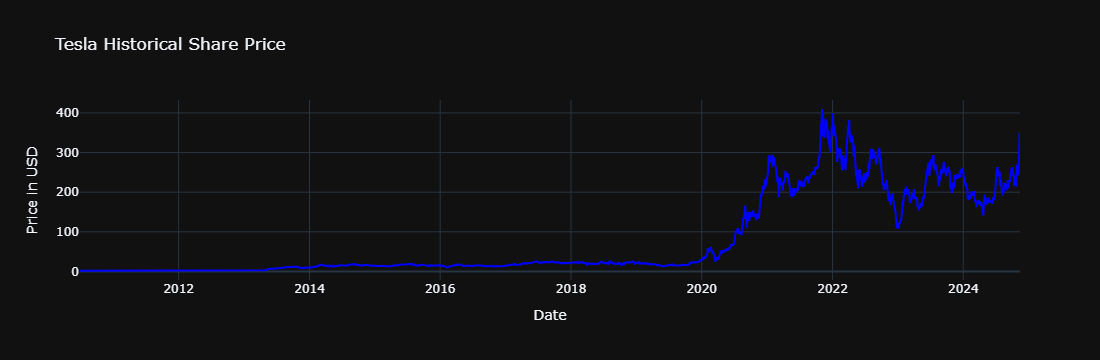

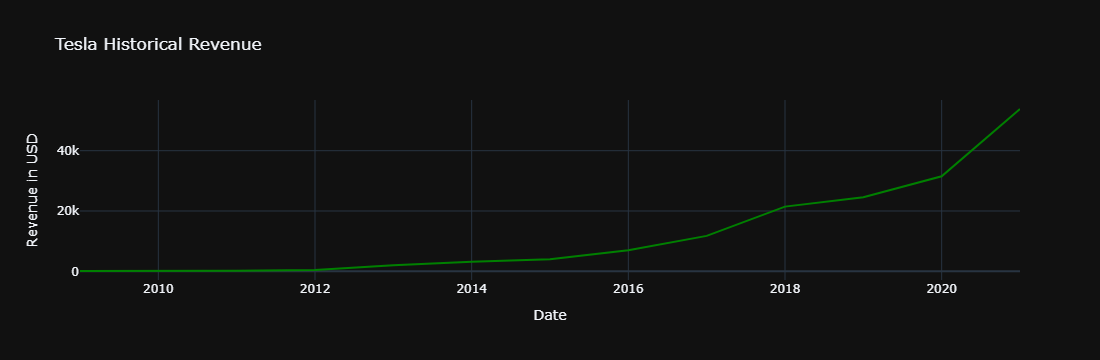

In [28]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Step 1: Use yfinance to get the Tesla stock data
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")  # Get the historical data

# Step 2: Use web scraping to get the Tesla revenue data
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the html using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')
tables = pd.read_html(html_data)
tesla_revenue = tables[0]  # Assuming the first table contains the revenue data

# Clean the revenue data
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(",|\$", "", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

# Step 3: Plot the historical stock price and revenue data using Plotly

# Plot 1: Historical Tesla Stock Price
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=tesla_data.index, y=tesla_data['Close'],
                         mode='lines', name='Stock Price', line=dict(color='blue')))
fig1.update_layout(title="Tesla Historical Share Price",
                  xaxis_title="Date", yaxis_title="Price in USD",
                  template="plotly_dark")

# Plot 2: Historical Tesla Revenue
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'],
                         mode='lines', name='Revenue', line=dict(color='green')))
fig2.update_layout(title="Tesla Historical Revenue",
                  xaxis_title="Date", yaxis_title="Revenue in USD",
                  template="plotly_dark")

# Show both graphs
fig1.show()
fig2.show()


In [13]:
## Question 3: Use yfinance to Extract Stock Data